<a href="https://colab.research.google.com/github/aakruti27/StockPrice_static/blob/main/StockPrice_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [213]:
weekly_stock=pd.read_csv('/content/005930.KS_weekly.csv')
weekly_stock=pd.DataFrame(weekly_stock)

In [214]:
weekly_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,38700.0,39400.0,36850.0,38750.0,34482.308594,47177112
1,2019-01-07,38000.0,40700.0,37950.0,40050.0,35639.144531,68587020
2,2019-01-14,40050.0,42750.0,39850.0,42750.0,38041.781250,54106211
3,2019-01-21,42750.0,45500.0,41350.0,45050.0,40088.472656,76571367
4,2019-01-28,45050.0,47050.0,44350.0,46350.0,41245.292969,69174596


# As Static data

1. Removing Date because we do not want to analyze time series here 
2. Dropping close and trying to predict Adj Close using other values (Close might have too much correlation) (performance with close was 0.008)
3. Volume does not have much correlation, it could be interesting to see the performance without it

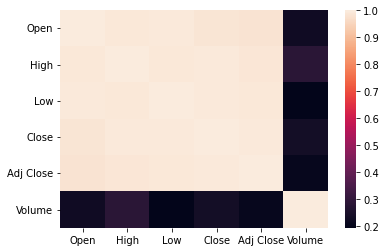

In [215]:
cor_mat=weekly_stock.corr()
sns.heatmap(cor_mat)

In [216]:
weekly_static=weekly_stock.drop(['Date','Close'],axis=1)
#weekly_static=weekly_stock.drop('Close',axis=1)
weekly_static.head()

,Open,High,Low,Adj Close,Volume
0,38700.0,39400.0,36850.0,34482.308594,47177112
1,38000.0,40700.0,37950.0,35639.144531,68587020
2,40050.0,42750.0,39850.0,38041.781250,54106211
3,42750.0,45500.0,41350.0,40088.472656,76571367
4,45050.0,47050.0,44350.0,41245.292969,69174596


# Analyzing the distributions of each attribute

(array([ 8., 35., 21., 36., 34., 13., 21., 19., 25.,  4.]),
 array([38000., 43230., 48460., 53690., 58920., 64150., 69380., 74610.,
        79840., 85070., 90300.]),
 <a list of 10 Patch objects>)

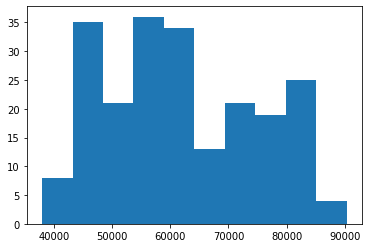

In [217]:
plt.hist(weekly_static['Open'])

(array([14., 36., 21., 52., 17., 18., 22., 27.,  7.,  2.]),
 array([39400., 45140., 50880., 56620., 62360., 68100., 73840., 79580.,
        85320., 91060., 96800.]),
 <a list of 10 Patch objects>)

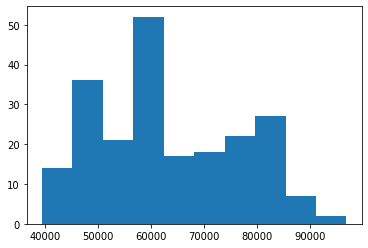

In [218]:
plt.hist(weekly_static['High'])


(array([ 6., 33., 24., 27., 38., 10., 19., 17., 19., 23.]),
 array([36850., 41575., 46300., 51025., 55750., 60475., 65200., 69925.,
        74650., 79375., 84100.]),
 <a list of 10 Patch objects>)

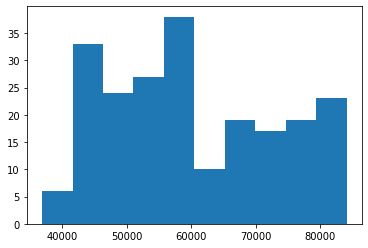

In [219]:
plt.hist(weekly_static['Low'])


(array([16., 31., 20., 26., 31., 19., 22., 21., 28.,  2.]),
 array([34482.30859375, 39756.02617187, 45029.74375   , 50303.46132812,
        55577.17890625, 60850.89648438, 66124.6140625 , 71398.33164062,
        76672.04921875, 81945.76679687, 87219.484375  ]),
 <a list of 10 Patch objects>)

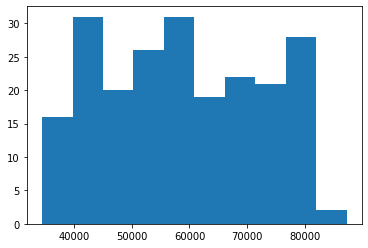

In [220]:
#plt.hist(weekly_static['Close'])
plt.hist(weekly_static['Adj Close'])

(array([ 4., 48., 85., 44., 18., 11.,  2.,  1.,  1.,  2.]),
 array([1.23466000e+05, 2.60500002e+07, 5.19765344e+07, 7.79030686e+07,
        1.03829603e+08, 1.29756137e+08, 1.55682671e+08, 1.81609205e+08,
        2.07535740e+08, 2.33462274e+08, 2.59388808e+08]),
 <a list of 10 Patch objects>)

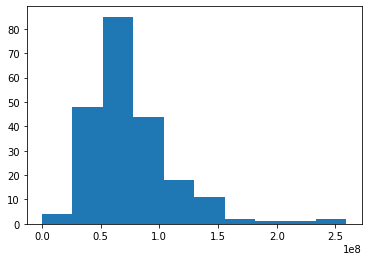

In [221]:
plt.hist(weekly_static['Volume'])

The volume is skewed to the left, there are less examples with volume betwen roughly 2.0 onwards, this points could act as outliers in our case

In [222]:
weekly_static.describe()

,Open,High,Low,Adj Close,Volume
count,216.000000,216.000000,216.000000,216.000000,2.160000e+02
mean,61723.379630,63259.027778,60279.629630,58679.683322,7.575765e+07
std,13098.450012,13245.088584,12831.386912,13584.646223,3.629400e+07
min,38000.000000,39400.000000,36850.000000,34482.308594,1.234660e+05
25%,50625.000000,52225.000000,49487.500000,46198.106445,5.283373e+07
50%,59800.000000,60900.000000,58200.000000,57562.656250,7.002489e+07
75%,73050.000000,74925.000000,71325.000000,70379.277344,8.996957e+07
max,90300.000000,96800.000000,84100.000000,87219.484375,2.593888e+08


In [223]:
scaler = StandardScaler()
weekly_std=pd.DataFrame(scaler.fit_transform(weekly_static),columns=weekly_static.columns)

In [224]:
weekly_std.describe()

,Open,High,Low,Adj Close,Volume
count,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02
mean,1.315820e-16,-2.631640e-16,6.579099e-17,-6.579099e-17,-7.401487e-17
std,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00
min,-1.815366e+00,-1.805533e+00,-1.830204e+00,-1.785367e+00,-2.088771e+00
25%,-8.492730e-01,-8.350007e-01,-8.430264e-01,-9.209346e-01,-6.330845e-01
50%,-1.471813e-01,-1.785196e-01,-1.624501e-01,-8.241818e-02,-1.583203e-01
75%,8.667385e-01,8.828232e-01,8.628083e-01,8.632371e-01,3.924872e-01
max,2.186747e+00,2.538215e+00,1.860727e+00,2.105767e+00,5.071298e+00


(array([ 4., 48., 85., 44., 18., 11.,  2.,  1.,  1.,  2.]),
 array([-2.08877129, -1.37276433, -0.65675737,  0.05924959,  0.77525656,
         1.49126352,  2.20727048,  2.92327744,  3.6392844 ,  4.35529136,
         5.07129832]),
 <a list of 10 Patch objects>)

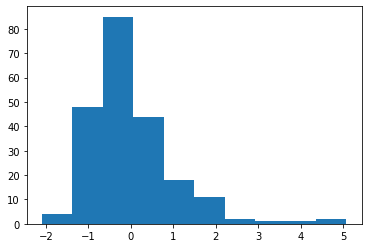

In [225]:
plt.hist(weekly_std['Volume'])

Removing volume from 3 and above because of less examples


In [226]:
newdf=weekly_std.drop(weekly_std[weekly_std['Volume']>3].index)

(array([ 4.,  4., 41., 53., 51., 28., 13., 10.,  5.,  3.]),
 array([-2.08877129, -1.61792447, -1.14707764, -0.67623082, -0.20538399,
         0.26546283,  0.73630966,  1.20715648,  1.6780033 ,  2.14885013,
         2.61969695]),
 <a list of 10 Patch objects>)

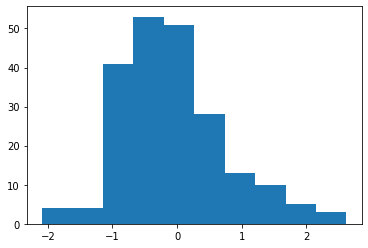

In [227]:
plt.hist(newdf['Volume'])

In [228]:
X=newdf.drop(['Adj Close'],axis=1)
y=newdf['Adj Close']

In [229]:
X.head()

,Open,High,Low,Volume
0,-1.761801,-1.805533,-1.830204,-0.789302
1,-1.815366,-1.707156,-1.744277,-0.198030
2,-1.658496,-1.552022,-1.595859,-0.597943
3,-1.451886,-1.343916,-1.478687,0.022472
4,-1.275885,-1.226619,-1.244342,-0.181803


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [231]:
X_train1,X_validation,y_train1,y_validation=train_test_split(X_train,y_train)

In [232]:
reg=LinearRegression(fit_intercept=True)
reg.fit(X_train1,y_train1)

LinearRegression()

In [233]:
mean_squared_error(y_validation,reg.predict(X_validation),squared=True)

0.015400855470496234

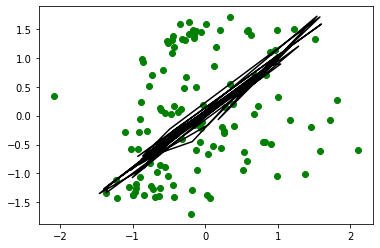

In [234]:
plt.scatter(X_train1['Volume'], y_train1,color='g') 
plt.plot(y_validation, reg.predict(X_validation),color='k') 
plt.show()

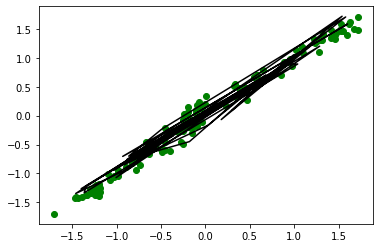

In [235]:
plt.scatter(X_train1['High'], y_train1,color='g') 
plt.plot(y_validation, reg.predict(X_validation),color='k') 
plt.show()

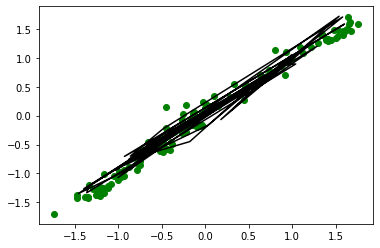

In [236]:
plt.scatter(X_train1['Low'], y_train1,color='g') 
plt.plot(y_validation, reg.predict(X_validation),color='k') 
plt.show()

#With Normalization

In [260]:
scaler1= MinMaxScaler()
weekly_norm=pd.DataFrame(scaler1.fit_transform(weekly_static),columns=weekly_static.columns)
weekly_norm.describe()

,Open,High,Low,Adj Close,Volume
count,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.453602,0.415663,0.495865,0.458830,0.291725
std,0.250448,0.230751,0.271564,0.257591,0.139988
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241396,0.223432,0.267460,0.222154,0.203306
50%,0.416826,0.374564,0.451852,0.437649,0.269613
75%,0.670172,0.618902,0.729630,0.680677,0.346541
max,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 4., 48., 85., 44., 18., 11.,  2.,  1.,  1.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

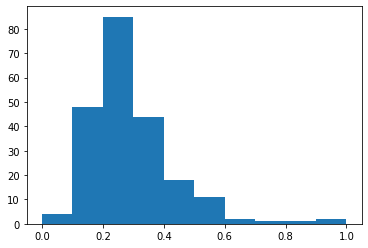

In [261]:
plt.hist(weekly_norm['Volume'])

(array([14., 36., 21., 52., 17., 18., 22., 27.,  7.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

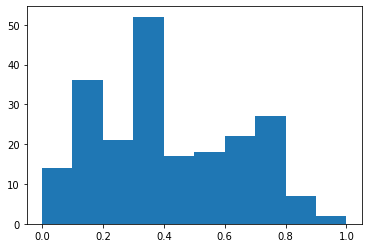

In [262]:
plt.hist(weekly_norm['High'])

In [265]:
weekly_norm=weekly_norm.drop(weekly_norm[weekly_norm['Volume']>0.7].index)

(array([ 4.,  4., 41., 53., 51., 28., 13., 10.,  5.,  3.]),
 array([0.        , 0.06576009, 0.13152018, 0.19728027, 0.26304036,
        0.32880045, 0.39456054, 0.46032063, 0.52608072, 0.59184081,
        0.6576009 ]),
 <a list of 10 Patch objects>)

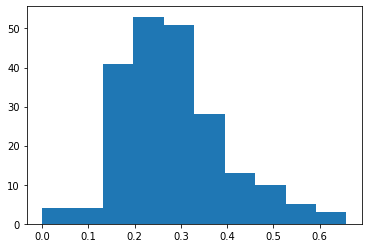

In [266]:
plt.hist(weekly_norm['Volume'])

In [267]:
X=weekly_norm.drop('Adj Close',axis=1)
y=weekly_norm['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train1,X_validation,y_train1,y_validation=train_test_split(X_train,y_train)

In [268]:
reg=LinearRegression(fit_intercept=True)
reg.fit(X_train1,y_train1)

LinearRegression()

Way better performance with normalized data because the original data does not follow gausian distrubution

In [269]:
mean_squared_error(y_validation,reg.predict(X_validation),squared=True)

0.0010109332938661227